In [25]:
import numpy as np
import json
from typing import List
import math
import os, os.path
from collections import defaultdict
import matplotlib.pyplot as plt

Got a dataset from Slay The Spire official discord where Baalor posted data about around 700 of his runs in 2022.

### Can we deterministically say what's the state of the deck at any floor?


In [4]:
data = json.load(open("C:/Users/lgerretsen/perso/perso/sts/2019-05-31-00-53#1028.json", "r"))


In [14]:
sample = data[0]
assert set(sample.keys()) == {'event'}
sample = sample["event"]
sample.keys()

dict_keys(['gold_per_floor', 'floor_reached', 'playtime', 'items_purged', 'score', 'play_id', 'local_time', 'is_ascension_mode', 'campfire_choices', 'neow_cost', 'seed_source_timestamp', 'circlet_count', 'master_deck', 'relics', 'potions_floor_usage', 'damage_taken', 'seed_played', 'potions_obtained', 'is_trial', 'path_per_floor', 'character_chosen', 'items_purchased', 'campfire_rested', 'item_purchase_floors', 'current_hp_per_floor', 'gold', 'neow_bonus', 'is_prod', 'is_daily', 'chose_seed', 'campfire_upgraded', 'win_rate', 'timestamp', 'path_taken', 'build_version', 'purchased_purges', 'victory', 'max_hp_per_floor', 'card_choices', 'player_experience', 'relics_obtained', 'event_choices', 'is_beta', 'boss_relics', 'items_purged_floors', 'is_endless', 'potions_floor_spawned', 'killed_by', 'ascension_level'])

In [15]:
sample["neow_bonus"]

'REMOVE_TWO'

In [16]:
sample["items_purged_floors"]


[7]

In [24]:
idx = 0
while 1:
    sample = data[idx]["event"]
    if sample["victory"]:
        break
    idx += 1
json.dump(sample, open("./example_vanilla.run", "w"), indent=4)

,Unnamed: 0,training_loss,training_L_inf,training_L_1,val_loss,val_L_inf,val_L_1
0,0,2.441414,0.863281,0.512630,1.780497,0.652344,0.216797
1,1,1.755751,0.621094,0.207185,2.201215,0.660156,0.217773
2,2,1.902064,0.613281,0.201172,NaN,NaN,NaN
3,3,2.281659,0.640625,0.212738,NaN,NaN,NaN
4,4,2.090119,0.617188,0.202819,NaN,NaN,NaN


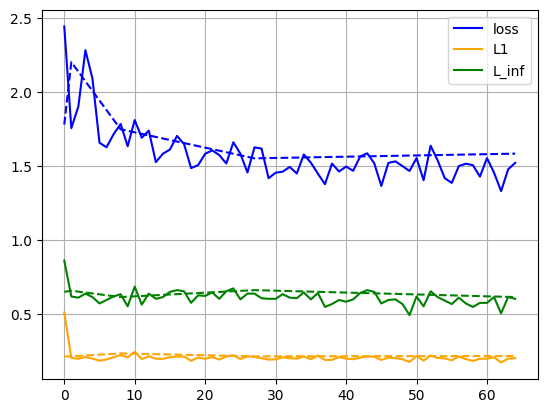

In [32]:
import pandas as pd

training_dirname = ""
training_dirname = "2023-01-01-14-38-05_november_blocks4-256_split0.8"
# training_dirname = "2023-01-01-14-13-45_november_blocks4-256_split0.2"
# training_dirname = "2023-01-01-14-10-46_november_blocks4-128_split0.001"
# training_dirname = "2022-12-23-21-39-39_november_blocks8"
# training_dirname = "2022-12-21-22-51-42_november"

df = pd.read_csv(f"../trainings/{training_dirname}/metrics.csv")

import matplotlib.pyplot as plt
import math

plt.grid()

plt.plot(list(df.training_loss), color="blue", label="loss")
plt.plot(list(df.training_L_1), color="orange", label="L1")
plt.plot(list(df.training_L_inf), color="green", label="L_inf")

def plot_holed_values(values, color, linestyle):
    xs = [i for i,val in enumerate(values) if not math.isnan(val)]
    ys = [val for val in values if not math.isnan(val)]
    plt.plot(xs, ys, color=color, linestyle=linestyle)
plot_holed_values(list(df.val_loss), color="blue", linestyle='dashed')
plot_holed_values(list(df.val_L_1), color="orange", linestyle='dashed')
plot_holed_values(list(df.val_L_inf), color="green", linestyle='dashed')
plt.legend()

df.head()

